In [27]:
!pip install catboost optuna

# lil EDA

In [28]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
train = pd.read_csv('train (1).csv')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

In [30]:
test = pd.read_csv('test.csv')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   height(cm)           10000 non-null  float64
 3   weight(kg)           10000 non-null  float64
 4   waist(cm)            10000 non-null  float64
 5   eyesight(left)       10000 non-null  float64
 6   eyesight(right)      10000 non-null  float64
 7   hearing(left)        10000 non-null  float64
 8   hearing(right)       10000 non-null  float64
 9   systolic             10000 non-null  float64
 10  relaxation           10000 non-null  float64
 11  fasting blood sugar  10000 non-null  float64
 12  Cholesterol          10000 non-null  float64
 13  triglyceride         10000 non-null  float64
 14  HDL                  10000 non-null  float64
 15  LDL                  10000 non-null  

In [31]:
print(train.head())
print(train.shape)
print(train.columns.tolist())

   id   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0  55.0       150.0        50.0       73.0             0.8   
1   1  50.0       160.0        60.0       79.6             1.0   
2   2  55.0       145.0        50.0       73.0             1.2   
3   3  40.0       175.0        80.0       83.2             0.9   
4   4  30.0       170.0        70.0       79.5             1.2   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...   HDL    LDL  \
0              1.0            1.0             1.0     122.0  ...  62.0  113.0   
1              0.8            1.0             1.0     124.0  ...  74.0  112.0   
2              1.2            1.0             1.0     110.0  ...  66.0  123.0   
3              1.0            1.0             1.0      99.0  ...  38.0  114.0   
4              1.2            1.0             1.0     119.0  ...  49.0  148.0   

   hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
0        12.0            1.0               0.6  

In [32]:
print(test.head())
print(test.shape)
print(test.columns.tolist())

      id   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0  15000  40.0       155.0        45.0       64.0             0.9   
1  15001  45.0       175.0        90.0      101.0             1.0   
2  15002  40.0       165.0        60.0       78.0             1.5   
3  15003  35.0       170.0        60.0       84.5             1.0   
4  15004  40.0       155.0        45.0       68.5             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  \
0              0.9            1.0             1.0     109.0  ...   
1              1.2            1.0             1.0     130.0  ...   
2              1.5            1.0             1.0     107.0  ...   
3              1.0            1.0             1.0     124.0  ...   
4              1.0            1.0             1.0     109.0  ...   

   triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine  \
0          50.0  79.0  108.0        13.3            1.0               0.9   
1         147.0  38.0 

In [33]:
print(train.isnull().sum())
print(test.isnull().sum())

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64
id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL         

In [34]:
print(train.describe())
print(test.describe())

                 id           age    height(cm)    weight(kg)     waist(cm)  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean    7499.500000     42.606000    164.672667     64.282000     80.323180   
std     4330.271354     10.415341      8.558684     10.973871      7.932701   
min        0.000000     20.000000    140.000000     35.000000      0.900000   
25%     3749.750000     40.000000    160.000000     55.000000     75.000000   
50%     7499.500000     40.000000    165.000000     65.000000     80.000000   
75%    11249.250000     50.000000    170.000000     70.000000     86.000000   
max    14999.000000     80.000000    190.000000    120.000000    121.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count    15000.000000     15000.000000   15000.000000    15000.000000   
mean         1.032727         1.025927       1.005533        1.004933   
std          0.312845         0.313488       0.074183        0.070067

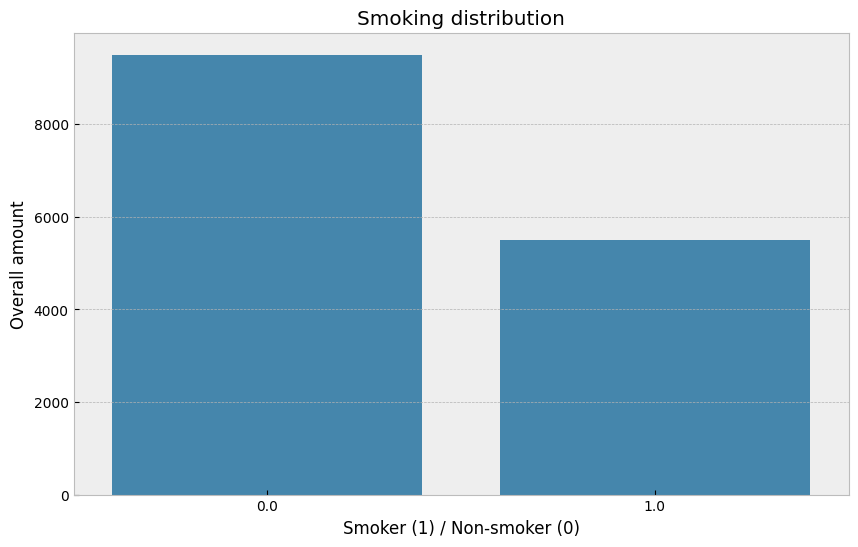

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking', data=train)
plt.title('Smoking distribution')
plt.xlabel('Smoker (1) / Non-smoker (0)')
plt.ylabel('Overall amount')
plt.show()

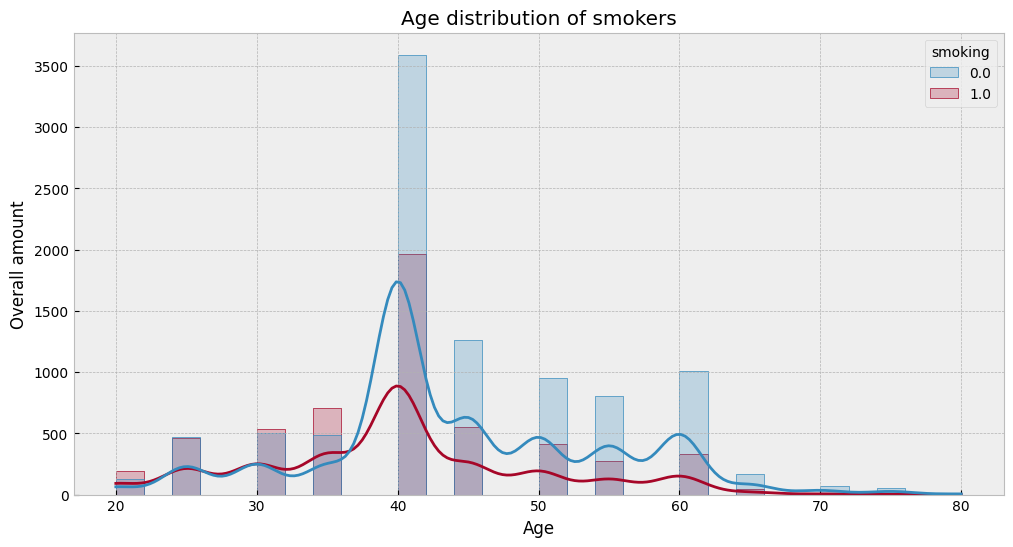

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='age', hue='smoking', bins=30, kde=True, element='step')
plt.title('Age distribution of smokers')
plt.xlabel('Age')
plt.ylabel('Overall amount')
plt.show()

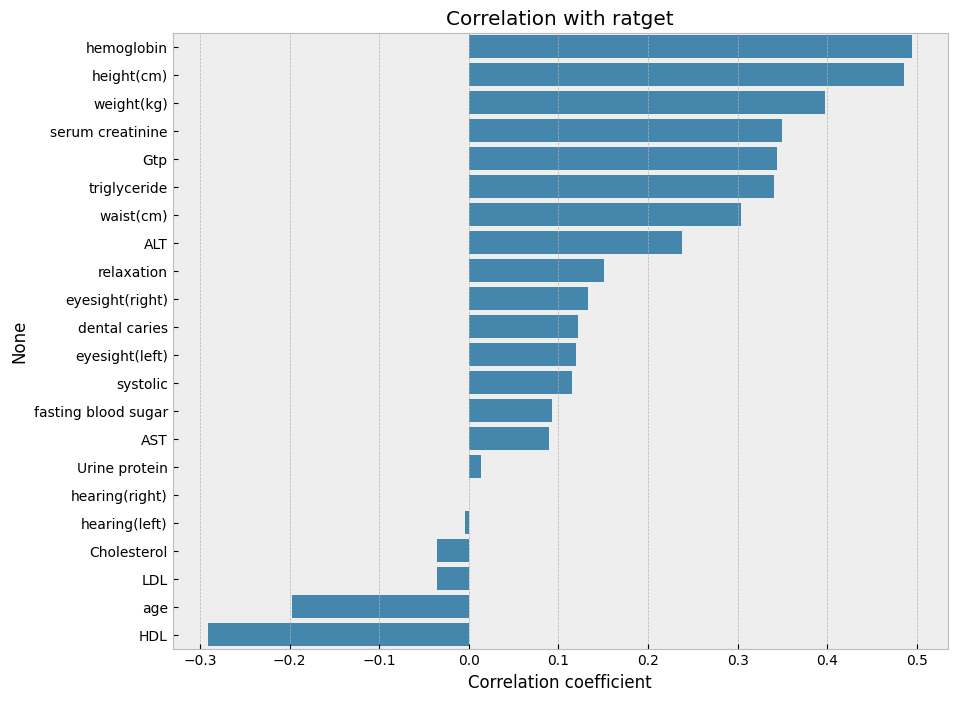

In [37]:
corr_with_target = train.drop(columns=['id']).corr()['smoking'].sort_values(ascending=False)[1:]
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with ratget')
plt.xlabel('Correlation coefficient')
plt.show()

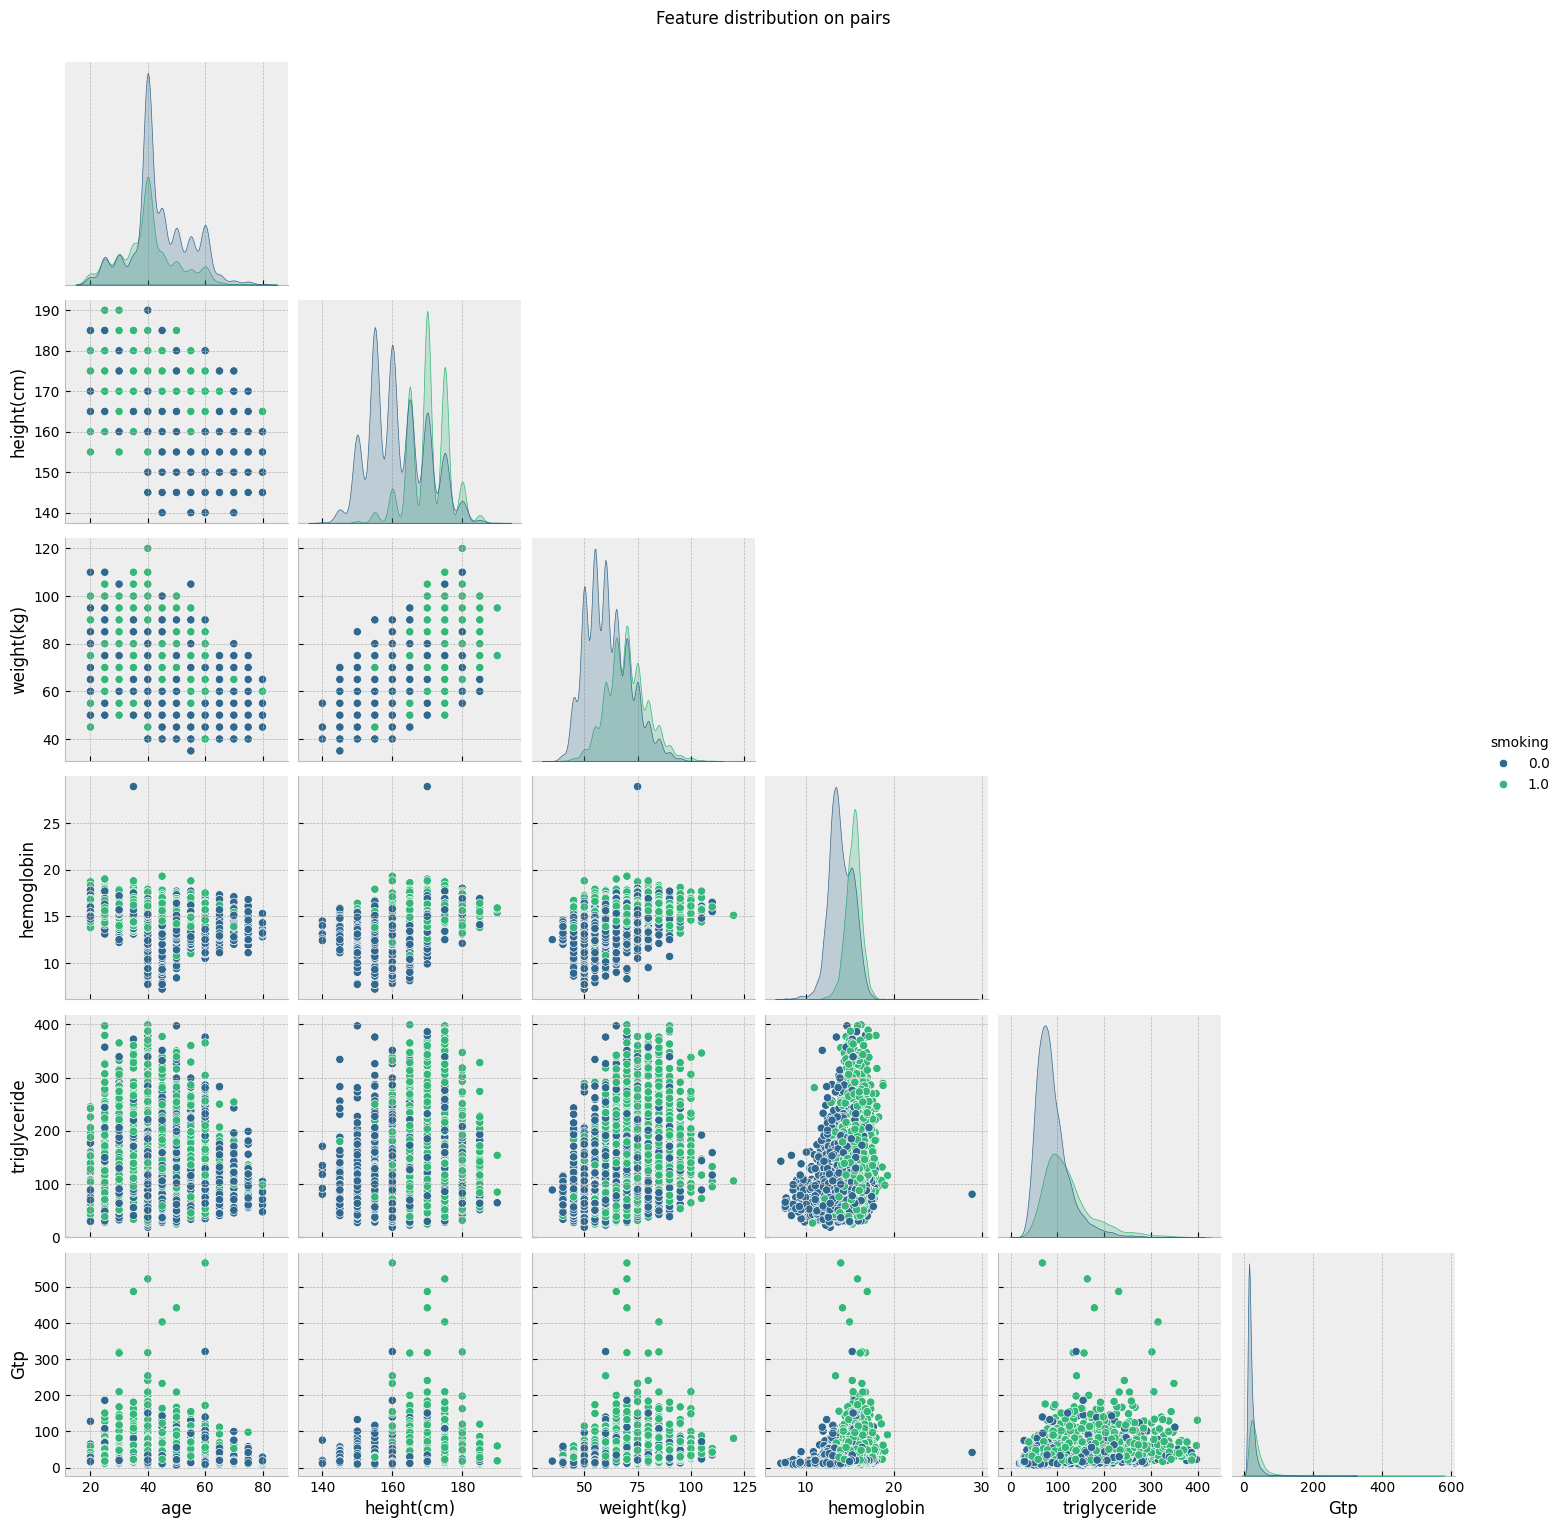

In [38]:
key_features = ['age', 'height(cm)', 'weight(kg)', 'hemoglobin', 'triglyceride', 'Gtp']
sns.pairplot(train[key_features + ['smoking']], hue='smoking', corner=True, palette='viridis')
plt.suptitle('Feature distribution on pairs', y=1.02)
plt.show()

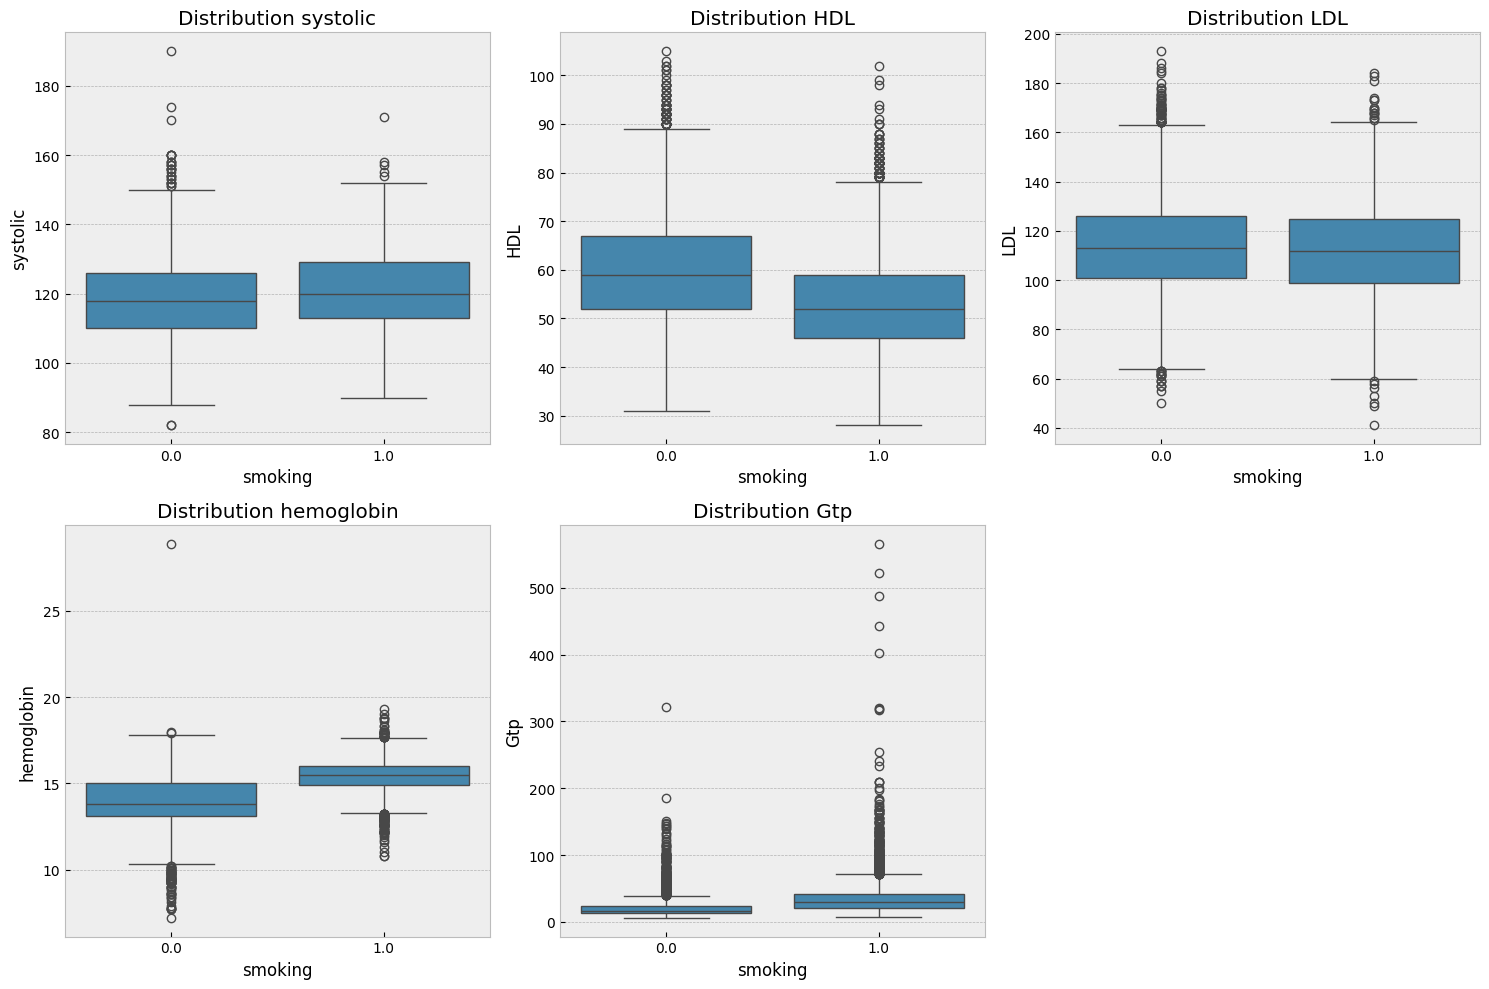

In [39]:
medical_features = ['systolic', 'HDL', 'LDL', 'hemoglobin', 'Gtp']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(medical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='smoking', y=feature, data=train)
    plt.title(f'Distribution {feature}')
plt.tight_layout()
plt.show()

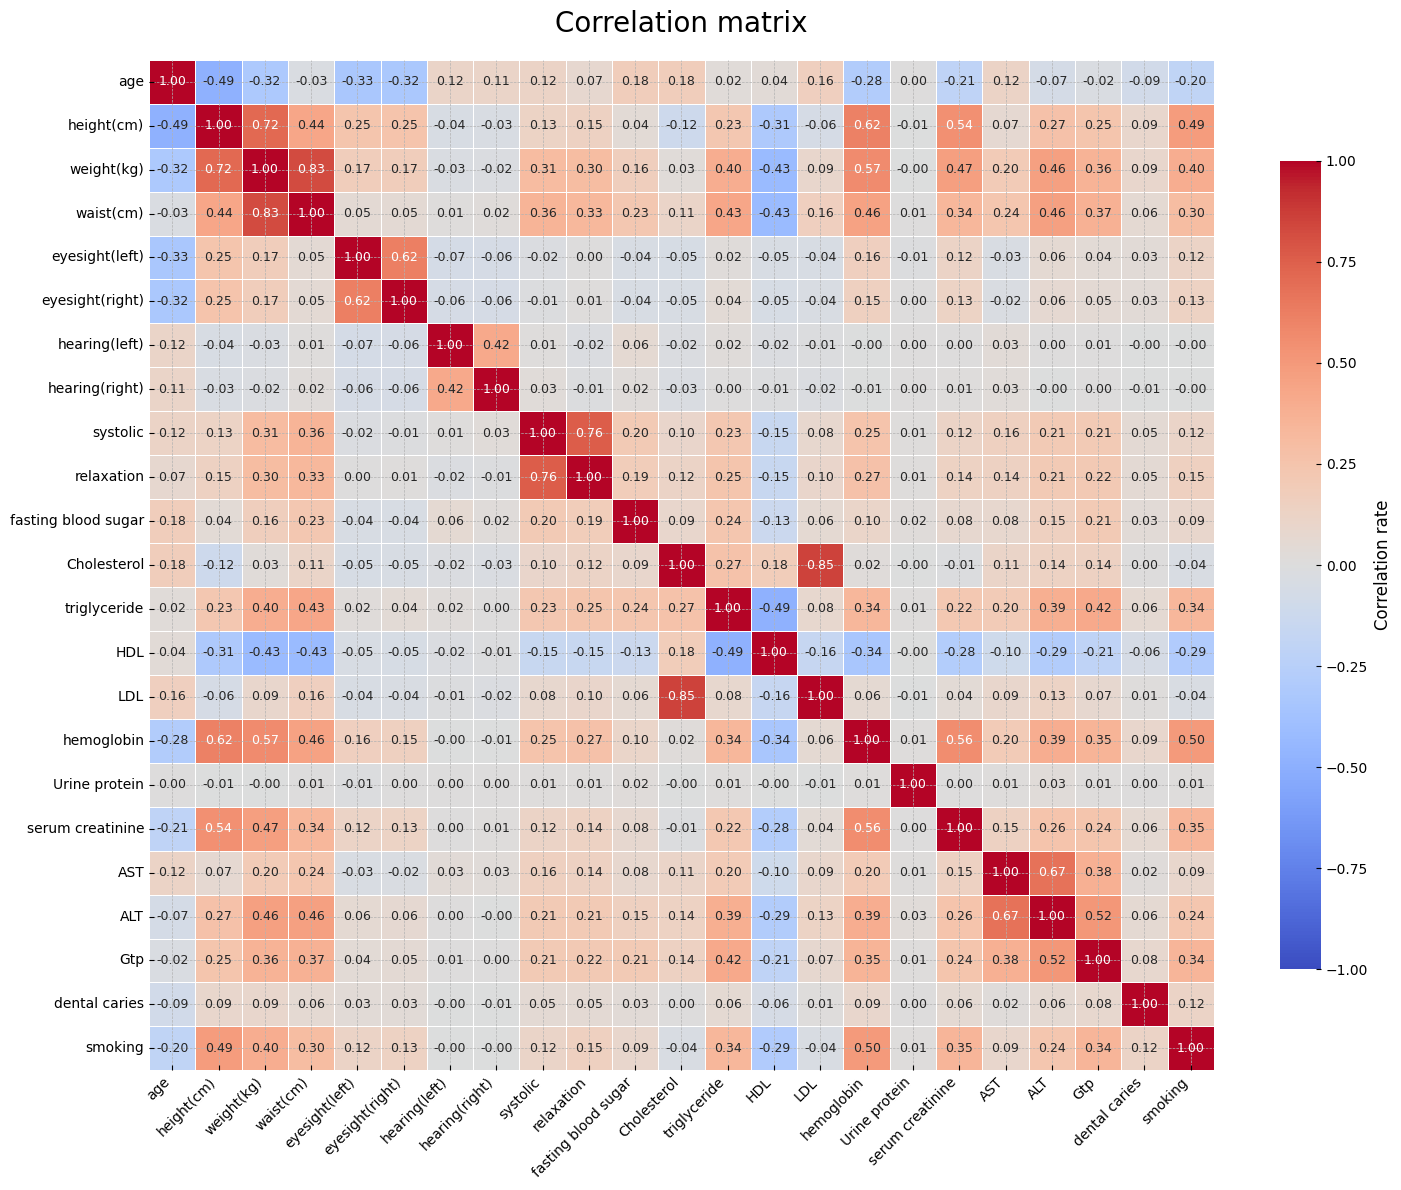

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

plt.figure(figsize=(15, 12), dpi=100)

corr_matrix = train.drop(columns='id').corr()

heatmap = sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
    vmin=-1,
    vmax=1,
    annot_kws={'size': 9}
)

plt.title('Correlation matrix', fontsize=20, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

heatmap.set_facecolor('#f5f5f5')

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Correlation rate', fontsize=12)

plt.tight_layout()



plt.show()

# Bagging regression


In [41]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils import resample

class MyBaggingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, n_estimators=10, random_state=None):
        self.base_estimator = base_estimator if base_estimator else DecisionTreeClassifier()
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.estimators_ = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.estimators_ = []

        for _ in range(self.n_estimators):
            X_sample, y_sample = resample(X, y, random_state=self.random_state)
            estimator = clone(self.base_estimator)
            estimator.fit(X_sample, y_sample)
            self.estimators_.append(estimator)

        return self

    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators_])
        predictions = predictions.astype(int)
        return np.array([np.bincount(predictions[:, i]).argmax()
                        for i in range(predictions.shape[1])])

    def predict_proba(self, X):
        probas = np.array([estimator.predict_proba(X)[:, 1] for estimator in self.estimators_])
        return np.mean(probas, axis=0)

# Metrics


In [42]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils import resample
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, average_precision_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

class MyMetrics:
    @staticmethod
    def accuracy_score(y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        return (y_true == y_pred).sum() / y_true.shape[0]

    @staticmethod
    def precision_score(y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        tp = (y_true * y_pred).sum()
        fp = ((y_true == 0) * y_pred).sum()
        if tp + fp == 0:
              return 1
        return tp / (tp + fp)

    @staticmethod
    def recall_score(y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        tp = (y_true * y_pred).sum()
        fn = (y_true * (y_pred == 0)).sum()
        return tp / (tp + fn)

    @staticmethod
    def f1_score(y_true, y_pred):
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        return 2 * precision * recall / (precision + recall)

    @staticmethod
    def roc_auc_score(y_true, y_pred_proba):
        y_true = np.array(y_true)
        y_pred_proba = np.array(y_pred_proba)
        thresholds = (y_pred_proba[1:] + y_pred_proba[:-1]) / 2
        unique_indices = np.where(y_pred_proba[1:] != y_pred_proba[:-1])[0]

        thresholds = thresholds[unique_indices]
        thresholds = np.concat((thresholds, np.array([-float('inf'), float('inf')])));
        thresholds = np.sort(thresholds)

        fpr = np.ndarray(thresholds.shape)
        tpr = np.ndarray(thresholds.shape)

        for i in range(0, thresholds.shape[0]):
          y_pred = y_pred_proba > thresholds[i]
          tp = (y_true * y_pred).sum()
          fp = ((y_true == 0) * y_pred).sum()
          tn = ((y_true == 0) * (y_pred == 0)).sum()
          fn = (y_true * (y_pred == 0)).sum()

          fpr[i] = fp / (fp + tn)
          tpr[i] = tp / (tp + fn)

        return 0.5 * np.abs(((fpr[1:] - fpr[:-1]) * (tpr[:-1] + tpr[1:])).sum())

    @staticmethod
    def pr_auc_score(y_true, y_pred_proba):
        y_true = np.array(y_true)
        y_pred_proba = np.array(y_pred_proba)
        thresholds = (y_pred_proba[1:] + y_pred_proba[:-1]) / 2
        unique_indices = np.where(y_pred_proba[1:] != y_pred_proba[:-1])[0]

        thresholds = thresholds[unique_indices]
        thresholds = np.concat((thresholds, np.array([-float('inf'), float('inf')])));
        thresholds = np.sort(thresholds)

        recalls = np.ndarray(thresholds.shape)
        precisions = np.ndarray(thresholds.shape)

        for i in range(0, thresholds.shape[0]):
          y_pred = y_pred_proba > thresholds[i]
          recalls[i] = recall_score(y_true, y_pred)
          precisions[i] = precision_score(y_true, y_pred)

        return 0.5 * np.abs(((recalls[1:] - recalls[:-1]) * (precisions[:-1] + precisions[1:])).sum())

# Estimate baggings



In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

X_train = train.drop(columns=['id', 'smoking'])
y_train = train['smoking']
X_test = test.drop(columns=['id'])

X_train, X_val, y_train, y_val = train_test_split(
    train.drop(columns=['id', 'smoking']),
    train['smoking'],
    test_size=0.2,
    random_state=42
)

my_bagging = MyBaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)
my_bagging.fit(X_train, y_train)

sklearn_bagging = BaggingClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)
sklearn_bagging.fit(X_train, y_train)

y_pred_my = my_bagging.predict(X_val)
y_proba_my = my_bagging.predict_proba(X_val)

y_pred_sk = sklearn_bagging.predict(X_val)
y_proba_sk = sklearn_bagging.predict_proba(X_val)[:, 1]

metrics = {
    'Accuracy': (accuracy_score, MyMetrics.accuracy_score),
    'Precision': (precision_score, MyMetrics.precision_score),
    'Recall': (recall_score, MyMetrics.recall_score),
    'F1-score': (f1_score, MyMetrics.f1_score),
    'AUC-ROC': (roc_auc_score, MyMetrics.roc_auc_score),
    'AUC-PR': (average_precision_score, MyMetrics.pr_auc_score)
}

print(f"{'Metric':<10} | {'My Implementation':<18} | {'Sklearn':<18} | {'Difference':<10}")
print("-" * 65)
for name, (sk_func, my_func) in metrics.items():
    try:
        if name in ['AUC-ROC', 'AUC-PR']:
            my_val = my_func(y_val, y_proba_my)
            sk_val = sk_func(y_val, y_proba_sk)
        else:
            my_val = my_func(y_val, y_pred_my)
            sk_val = sk_func(y_val, y_pred_sk)

        print(f"{name:<10} | {my_val:.4f}{'':<5} | {sk_val:.4f}{'':<5} | {abs(my_val - sk_val):.4f}")
    except Exception as e:
        print(f"{name:<10} | Error: {str(e)}")

Metric     | My Implementation  | Sklearn            | Difference
-----------------------------------------------------------------
Accuracy   | 0.7710      | 0.7893      | 0.0183
Precision  | 0.7080      | 0.6881      | 0.0198
Recall     | 0.6763      | 0.8149      | 0.1386
F1-score   | 0.6918      | 0.7462      | 0.0544
AUC-ROC    | 0.8531      | 0.8720      | 0.0189
AUC-PR     | 0.7093      | 0.7627      | 0.0534


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


На пятидесяти классификаторах получаем вполне удовлетворительный результат. Едем к бустингу


# Gradient boosting and implementations estimation



In [44]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import make_classification
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

class MyGradientBoostingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []
        self.initial_pred = None
        self.classes_ = None

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.classes_ = np.unique(y)

        self.initial_pred = np.log(np.mean(y) / (1 - np.mean(y)))
        pred = np.full(len(y), self.initial_pred)

        for _ in range(self.n_estimators):
            residuals = y - self._sigmoid(pred)

            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X, residuals)

            pred += self.learning_rate * tree.predict(X)

            self.models.append(tree)

        return self

    def predict_proba(self, X):
        pred = np.full(X.shape[0], self.initial_pred)
        for model in self.models:
            pred += self.learning_rate * model.predict(X)
        proba = self._sigmoid(pred)
        return np.vstack([1-proba, proba]).T

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba > 0.5).astype(int)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

def compare_models(X_train, y_train, X_test, y_test):
    my_gb = MyGradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    my_gb.fit(X_train, y_train)
    my_pred = my_gb.predict(X_test)
    my_proba = my_gb.predict_proba(X_test)[:, 1]

    lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)
    lgb_proba = lgb_model.predict_proba(X_test)[:, 1]

    xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

    cb_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_seed=42, verbose=0)
    cb_model.fit(X_train, y_train)
    cb_pred = cb_model.predict(X_test)
    cb_proba = cb_model.predict_proba(X_test)[:, 1]

    models = {
        'MyGB': (my_pred, my_proba),
        'LightGBM': (lgb_pred, lgb_proba),
        'XGBoost': (xgb_pred, xgb_proba),
        'CatBoost': (cb_pred, cb_proba)
    }

    print(f"{'Model':<10} | {'Accuracy':<8} | {'LogLoss':<8} | {'AUC-ROC':<8}")
    print("-" * 45)
    for name, (pred, proba) in models.items():
        acc = accuracy_score(y_test, pred)
        ll = log_loss(y_test, proba)
        auc = roc_auc_score(y_test, proba)
        print(f"{name:<10} | {acc:.4f}    | {ll:.4f}    | {auc:.4f}")

X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

compare_models(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4001, number of negative: 3999
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500125 -> initscore=0.000500
[LightGBM] [Info] Start training from score 0.000500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Model      | Accuracy | LogLoss  | AUC-ROC 
---------------------------------------------
MyGB       | 0.9295    | 0.2617    | 0.9705
LightGBM   | 0.9400    | 0.1830    | 0.9763
XGBoost    | 0.9400    | 0.1846    | 0.9759
CatBoost   | 0.9380    | 0.1868    | 0.9762


LGBMClassifier показывает наилучший результат. Остановимся на нем.

Подберем гиперпараметры.

In [45]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'tree_method': 'hist',
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'random_state': 42
    }

    model = xgb.XGBClassifier(**params)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=3600)
print("The fittest hyperparameter:")
best_params = study.best_params
print(best_params)

best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of test dataset: {accuracy:.4f}")

optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

[I 2025-05-25 08:33:09,150] A new study created in memory with name: no-name-e5f3554f-48a8-473b-8bd5-e42f226fa26d
[I 2025-05-25 08:33:14,130] Trial 0 finished with value: 0.932 and parameters: {'lambda': 1.8600510509676014e-05, 'alpha': 2.4755028851290447e-08, 'max_depth': 10, 'eta': 0.20693930010111752, 'gamma': 2.681448037369397e-07, 'colsample_bytree': 0.7570797404364417, 'colsample_bylevel': 0.8726723034547093, 'subsample': 0.8913174088704187, 'min_child_weight': 2, 'n_estimators': 313}. Best is trial 0 with value: 0.932.
[I 2025-05-25 08:33:17,761] Trial 1 finished with value: 0.934375 and parameters: {'lambda': 2.5700524090481032e-08, 'alpha': 0.023702739192783907, 'max_depth': 9, 'eta': 0.039633906901952884, 'gamma': 0.07607934938237466, 'colsample_bytree': 0.4699900039051349, 'colsample_bylevel': 0.6345213248906102, 'subsample': 0.9914220279913611, 'min_child_weight': 11, 'n_estimators': 283}. Best is trial 1 with value: 0.934375.
[I 2025-05-25 08:33:20,790] Trial 2 finished wi

The fittest hyperparameter:
{'lambda': 2.7550959130860532e-08, 'alpha': 0.008466831252721282, 'max_depth': 9, 'eta': 0.02896484418862255, 'gamma': 0.0007311275001269551, 'colsample_bytree': 0.5587649589937966, 'colsample_bylevel': 0.6368809693004922, 'subsample': 0.8040951111774005, 'min_child_weight': 8, 'n_estimators': 209}

Accuracy of test dataset: 0.9365


# Prediction as a product


Вынесем вердикт.
(не Максим)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import pandas as pd

train = pd.read_csv('train (1).csv')
test = pd.read_csv('test.csv')

X_train = train.drop(columns=['id', 'smoking'])
y_train = train['smoking']
X_test = test.drop(columns=['id'])

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42
)

final_model = BaggingClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)
final_model.fit(X_train, y_train)

test_proba = final_model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'id': test['id'],
    'smoking': test_proba
})

print(f"Test IDs: {len(test['id'])}, Predictions: {len(test_proba)}")
assert len(test['id']) == len(test_proba), "Aren't coextensive."

submission.to_csv('submission.csv', index=False)

print(submission.head())

Test IDs: 10000, Predictions: 10000
      id   smoking
0  15000  0.022966
1  15001  0.680482
2  15002  0.298527
3  15003  0.660036
4  15004  0.022966
